## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [32]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [4]:
df.shape[0]

294478

**The dataset has 294,478 rows.**

c. The number of unique users in the dataset.

In [5]:
len(df['user_id'].unique())

290584

**There are 290,584 unique users in the dataset.**

d. The proportion of users converted.

In [6]:
df['converted'].mean()

0.11965919355605512

**11.96% of users converted.**

e. The number of times the `new_page` and `treatment` don't line up.

In [7]:
df[(df['group'] == 'treatment')&(df['landing_page']!='new_page')]['user_id'].count() + df[(df['group'] != 'treatment')&(df['landing_page']=='new_page')]['user_id'].count()

3893

**Considering the rows in which the group is equal to "treatment" and the landing page is not the new page, plus the rows in which the landing page is the new one but the group is not equal to "treatment", we have 3,893 rows in which new_page and treatment don't line up.**

f. Do any of the rows have missing values?

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


**All the columns have the same number of non-null rows, which is also equal to the total number of rows calculated before, so there are no missing values in the dataset.**

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [33]:
index_to_drop = []
[index_to_drop.append(i) for i in df[(df['group'] == 'treatment') & (df['landing_page'] != 'new_page')].index]
[index_to_drop.append(i) for i in df[(df['group'] != 'treatment') & (df['landing_page'] == 'new_page')].index]
df2 = df.drop(df.index[index_to_drop])
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


**I added the rows in which new_page and treatment didn't line up to an array called index_to_drop. Then, I droped the rows that had those indexes and stored the others into df2.**

In [10]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [11]:
len(df2['user_id'].unique())

290584

**Even after removing the inaccurate rows, there are still 290,584 unique users in the dataframe.**

b. There is one **user_id** repeated in **df2**.  What is it?

In [12]:
df2[df2['user_id'].duplicated() == True]['user_id']

2893    773192
Name: user_id, dtype: int64

**The repeated user id in df2 is 773192.**

c. What is the row information for the repeat **user_id**? 

In [13]:
df2[df2['user_id'].duplicated() == True]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


**The repeated user is part of the treatment group, he/she accessed the page in 2017-01-14 02:55:59.590927 and has not converted.**

d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [34]:
df2 = df2.drop(df2.index[df2[df2['user_id'].duplicated() == True].index])

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [15]:
df2['converted'].mean()

0.11959708724499628

**The probability of an individual converting regardless of the page they receive is 11.96%.**

b. Given that an individual was in the `control` group, what is the probability they converted?

In [16]:
df2[df2['group'] == 'control']['converted'].mean()

0.1203863045004612

 **Given that an individual was in the control group,the probability they converted is 12.04%.**

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [17]:
df2[df2['group'] == 'treatment']['converted'].mean()

0.11880806551510564

 **Given that an individual was in the treatment group, the probability they converted is 11.88%.**

d. What is the probability that an individual received the new page?

In [18]:
len(df2[df2['landing_page'] == 'new_page']['user_id'])/len(df2['user_id'])

0.5000619442226688

**The probability that an individual received the new page is 50.01%.**

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**Considering that the number of users is high and each group has aproximately the same number of users, at first it is possible to think that there is enough evidence that the old page leads to more conversions because it has the higher probability of conversion in the dataset. Nevertheless, the conversion probabilities for treatment and control groups are very close to each other, and there is also the fact that it is possible that the numbers are biased by old users resisting to change or too willing to accept change (we have to analyse if the time used for the test was enough to eliminate this effect). In short, there is not enough evidence to evaluate which page leads to more conversions yet.**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Null hypothesis: $H_{o}$ is $p_{old}$ >= $p_{new}$**
**Alternatve hypothesis: $H_{1}$ is $p_{old}$ < $p_{new}$**

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [19]:
pnew = df2['converted'].mean()
print(pnew)

0.11959708724499628


**$p_{new}$ is the same as the convert rate for the ab_data dataset regardless of the page, which is 11.96%.**

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [20]:
pold = df2['converted'].mean()
print(pold)

0.11959708724499628


**$p_{old}$ is the same as the convert rate for the ab_data dataset regardless of the page, which is 11.96%.**

c. What is $n_{new}$?

In [21]:
nnew = len(df2[df2['landing_page'] == 'new_page']['user_id'])
print(nnew)

145310


**$n_{new}$ is 145,310.**

d. What is $n_{old}$?

In [22]:
nold = len(df2[df2['landing_page'] == 'old_page']['user_id'])
print(nold)

145274


**$n_{old}$ is 145,274.**

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [111]:
new_page_converted = df2[df2['group'] == 'treatment'].sample(nnew, replace = True)
pnew = new_page_converted['converted'].mean()
print(pnew)

0.119000757002271


**I created and array of 1s and 0s with 145,310 elements ($n_{new}$) in which the mean, or in this case also the conversion rate, would be close to 11.96% ($p_{new}$).**

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [112]:
old_page_converted = df2[df2['group'] == 'control'].sample(nold, replace = True)
pold = old_page_converted['converted'].mean()
print(pold)

0.11966353235954127


**I created and array of 1s and 0s with 145,274 elements ($n_{old}$) in which the mean, or in this case also the conversion rate, would be close to 11.96% ($p_{old}$).**

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [114]:
pnew = np.mean(np.array(new_page_converted['converted']))
pold = np.mean(np.array(old_page_converted['converted']))
print(pnew - pold)

-0.0006627753572702733


**As expected, the difference between $p_{new}$ and $p_{old}$ is aproximately zero.**

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [116]:
p_diffs = []
for i in range(10000):
    new_sample = df2.sample(df2.shape[0], replace = True)
    new = new_sample[new_sample['group'] == 'treatment']
    old = new_sample[new_sample['group'] == 'control']
    pnew = new['converted'].mean()
    pold = old['converted'].mean()
    p_diffs.append(pnew - pold)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

(array([1.500e+01, 1.400e+02, 7.040e+02, 1.917e+03, 2.947e+03, 2.619e+03,
        1.266e+03, 3.400e+02, 5.000e+01, 2.000e+00]),
 array([-0.00613549, -0.00518377, -0.00423205, -0.00328033, -0.00232861,
        -0.00137689, -0.00042517,  0.00052655,  0.00147827,  0.00242998,
         0.0033817 ]),
 <BarContainer object of 10 artists>)

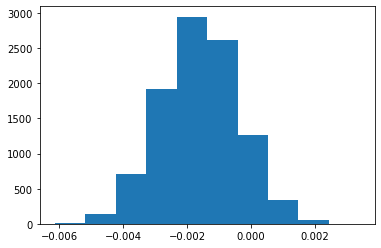

In [117]:
plt.hist(p_diffs)

**The histogram looks like a normal distribution.**

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [118]:
(p_diffs > (df2[df2['group'] == 'treatment']['converted'].mean() - df2[df2['group'] == 'control']['converted'].mean())).mean()

0.4923

**49.23% of p_diffs values are greater than the difference between the ld and new page conversion rate observed in ab_data database.**

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**We just computed the p-value, which is the proportion of values in the null hypothesis distribution that are higher than the values observed in our data (ab_data), values meaning the difference of conversion rate between the new and old page. That means that 49,23% of the values of the null hypothesis distribution were more extreme than the values observed in our data in favor of the alternative hypothesis. A p-value higher than the Tipe 1 error rate of 5% indicates that we should not reject the null hypothesis, which means that there is no difference between the new and old pages.**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [23]:
import statsmodels.api as sm

convert_old = df2[df2['group'] == 'control']['converted'].mean()
convert_new = df2[df2['group'] == 'treatment']['converted'].mean()
n_old = df2[df2['group'] == 'control'].shape[0]
n_new = df2[df2['group'] == 'treatment'].shape[0]

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [28]:
from statsmodels.stats.proportion import proportions_ztest
convert_rates = np.array([df2[(df2['group'] == 'control')&(df2['converted'] == 1)].shape[0], df2[(df2['group'] == 'treatment')&(df2['converted'] == 1)].shape[0]])
n = np.array([n_old, n_new])
zscore, pvalue = proportions_ztest(convert_rates, n)
print(pvalue)
print(zscore)

0.18988337448195103
1.3109241984234394


**I could not open the link available about the stats.proportions_ztest, so I acessed the stats.proportions_ztest documentation and followed the instructions of the following link: https://www.statsmodels.org/stable/generated/statsmodels.stats.proportion.proportions_ztest.html**

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**A p-value of 0.1898 (higher than the tipe 1 error rate)indicates that the null hypothesis is correct ans there is no difference in the conversion rate of the old and new pages, which is the same conclusion that we got to in parts j. and k.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**We could perform a Logistec Regression, once there are only two categorical outcomes to each row.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [35]:
df2['intercept'] = 1
df2[['ab_page_0', 'ab_page']] = pd.get_dummies(df2['group'])
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page_0,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [37]:
log_reg = sm.Logit(df2['converted'], df2[['intercept','ab_page']])
results = log_reg.fit()


Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [38]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sun, 30 May 2021   Pseudo R-squ.:               8.077e-06
Time:                        16:41:28   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**The p-value associated with ab_page is 0.19. The p-value in this case is associated with the null hypotheses that the regression coefficient for ab_page is 0, and the alternative hypotjesis that it is different from zero. Again, the -value is higher than the type 1 error rate, so we fail to reject the null hypothesis, meaning that the result is that the population coefficient for ab_page is zero, and therefore there is no difference between the new and old pages conversion rate.**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**It is possible that other factors influence in the conversion rate of the new and the old pages. Adding other factors to the regression model can help better explain the behaviour of the conversion rates. The inclusion of those factors could lead to a less efficient model (more variables, but not enough improvement in the model), but it is necessary to try these new models to evaluate that.**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [40]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
print(df_new['country'].unique())
df_new.head()

['US' 'UK' 'CA']


,country,timestamp,group,landing_page,converted,intercept,ab_page_0,ab_page
user_id,,,,,,,,
630000,US,2017-01-19 06:26:06.548941,treatment,new_page,0,1,0,1
630001,US,2017-01-16 03:16:42.560309,treatment,new_page,1,1,0,1
630002,US,2017-01-19 19:20:56.438330,control,old_page,0,1,1,0
630003,US,2017-01-12 10:09:31.510471,treatment,new_page,0,1,0,1
630004,US,2017-01-18 20:23:58.824994,treatment,new_page,0,1,0,1


In [42]:
### Create the necessary dummy variables
df_new[['country_1', 'country_2', 'country_3']] = pd.get_dummies(df_new['country'])
df_new.head()


,country,timestamp,group,landing_page,converted,intercept,ab_page_0,ab_page,country_1,country_2,country_3
user_id,,,,,,,,,,,
630000,US,2017-01-19 06:26:06.548941,treatment,new_page,0,1,0,1,0,0,1
630001,US,2017-01-16 03:16:42.560309,treatment,new_page,1,1,0,1,0,0,1
630002,US,2017-01-19 19:20:56.438330,control,old_page,0,1,1,0,0,0,1
630003,US,2017-01-12 10:09:31.510471,treatment,new_page,0,1,0,1,0,0,1
630004,US,2017-01-18 20:23:58.824994,treatment,new_page,0,1,0,1,0,0,1


In [43]:
### Perform logistic regression to understand the impact of country on conversion
log_reg = sm.Logit(df_new['converted'], df_new[['intercept','country_1', 'country_2']])
results = log_reg.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Sun, 30 May 2021   Pseudo R-squ.:               1.521e-05
Time:                        17:04:45   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9967      0.007   -292.314      0.000      -2.010      -1.983
country_1     -0.0408      0.027     -1.518      0.129      -0.093       0.012
country_2      0.0099      0.013      0.746      0.456      -0.016       0.036
==============================================================================
"""

**Aparently, country does not explain well the conversion rates. We can see that the p-values for both country_1 and contry_2 are higher than 5%, so we fail to reject the null hypothesis that the coefficient of this two variables is equal to zero. Also, the intercept coefficient has a higher absolute value that the previous model, which indicates that there is more that is not explained in the model than there was in the previous model.**

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [44]:
### Fit Your Linear Model And Obtain the Results
log_reg2 = sm.Logit(df_new['converted'], df_new[['intercept','country_1', 'country_2','ab_page']])
results = log_reg2.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Sun, 30 May 2021   Pseudo R-squ.:               2.323e-05
Time:                        17:09:49   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9893      0.009   -223.763      0.000      -2.007      -1.972
country_1     -0.0408      0.027     -1.516      0.130      -0.093       0.012
country_2      0.0099      0.013      0.743      0.457      -0.016       0.036
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
==============================================================================
"""

**Adding the page to the country model seemed to improve it a little, but the p-values are still high, which does not make our model a good one. The new page does not seem to be better than the old one in terms of conversion and the country does not have a considerable impact on the conversion rate either. The conclusions of the whole analysis are in the cell below.**

## Conclusions

**As we seen before, the new page appears to have the same results as the old page: p-values higher than type 1 error rate of 5% indicate that we fail to reject the null hypothesis, which states that conversion rates of the old and new pages are the same (this conclusion is valid if we consider that the duration of the test application was adequate). With the data available, it was not possible to find another factor that explains well the conversion rate, so at first, we can suggest that the old page must be mantained. However, if the new page is more efficient of has any benefit to the company in terms of costs ou practicality or other, it could also be applied, once the change will not affect the conversion rate.**

## Resources

**I could not open the link available about the stats.proportions_ztest, so I acessed the stats.proportions_ztest documentation and followed the instructions of the following link: https://www.statsmodels.org/stable/generated/statsmodels.stats.proportion.proportions_ztest.html**